classifier= None


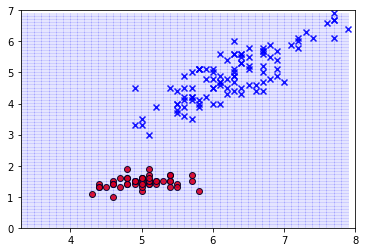

classifier= a


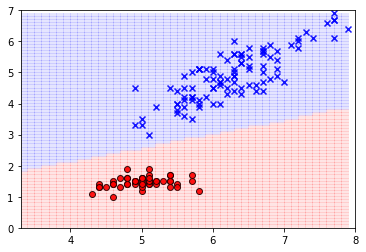

classifier= b


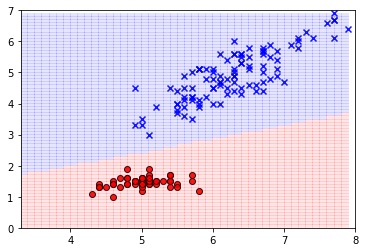

classifier= c


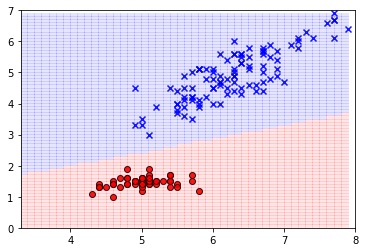

In [2]:
#
# 02_Perceptron.py
# ry@2018.10.10
#

import numpy as np
import matplotlib.pyplot as plt
import matplotlib.colors
import pandas as pd

def plot_decision_regions_binary(X, y, 
                          classifier= None, 
                          resolution= 1, 
                          xylim= None):

    markers=  ('x',   'o')
    colors=   ('blue','red')
    colormap= matplotlib.colors.ListedColormap(colors)

    # 取得 資料集特徵向量 X，以及標籤 y
    # X= ... 
    # y= ... 

    # 先假設 尚無 classifier
    # classifier= None 

    # surface 網格點 (meshGrid) 之解析度
    ### resolution= 1 # .1

    # 設定 類別標記 圖示標記 和 顏色 之 對應
    # setup marker generator and color map

    # 以本題而言，  '-1', '+1' ==> index= [0, 1] ==> ['x', 'o'] ==> ['blue', 'red']
    uniqueY= np.unique(y) # == [-1, +1]
    # np.unique(y) Returns the sorted unique elements of an array.

    # plot samples with labels

    for i, lb in enumerate(uniqueY):

        x0= X[y == lb, 0] 
        x1= X[y == lb, 1]

        plt.scatter(x= x0, 
                    y= x1, 
                    label= lb,
                    alpha= .9, 
                    c=      colors[i],
                    marker= markers[i], 
                    edgecolor='black')

    #plt.xlim(x0_min, x0_max)
    #plt.ylim(x1_min, x1_max)
    #plt.show()

    # plot the decision surface

    # 橫坐標 x0, 縱座標 x1 之最大與最小值
    if xylim == None:
        x0_min= X[:, 0].min() - 1
        x0_max= X[:, 0].max() + resolution
        x1_min= X[:, 1].min() - 1
        x1_max= X[:, 1].max() + resolution
        
    elif isinstance(xylim,(int,float)):
        x0_min= x1_min = -abs(xylim)
        x0_max= x1_max = +abs(xylim) + resolution
    
    else:
        x0_min= x1_min = -10
        x0_max= x1_max = +10 + resolution
    

    #製造所有範圍內的「網格點」(meshGrid)
    xx0, xx1= np.meshgrid(np.arange(x0_min, x0_max, resolution),
                          np.arange(x1_min, x1_max, resolution))

    if classifier == None:
        
        # 沒有 classifier 時， 
        # 先用一條不等式來二分全平面 (+1/-1)        
        # z(x,y) = x + y - 10
        # z(x,y) <= 0  ==> u= +1
         
        #z=  xx0.ravel() + xx1.ravel() - 10
        #z= -xx0.ravel() - xx1.ravel() + 10
        z=  xx0.ravel() + xx1.ravel() - 1

        u= (z<=0)    # True / False
        u= u*2-1     # True ==> +1 / False ==> -1
        Z= np.array(u).T
    else:
        # 若有 classfier，可用它 對所有網格點做 predict (工程浩大喔！) 
        u= np.array([xx0.ravel(), xx1.ravel()])
        Z= classifier.predict(u.T) #.T


    Z= Z.reshape(xx0.shape)

    # plt.contourf(xx0, xx1, Z, alpha= .1, cmap= colormap)
    # plt.pcolormesh(xx0, xx1, Z, alpha= .1, cmap= colormap)

    plt.pcolormesh(xx0, xx1, Z, alpha= .1, cmap= colormap)

    plt.xlim(x0_min, x0_max)
    plt.ylim(x1_min, x1_max)
    plt.show()

class Perceptron: #(object):
    """Perceptron classifier.

    Parameters
    ------------
    eta : float
      Learning rate (between 0.0 and 1.0)
    n_iter : int
      Passes over the training dataset.
    random_state : int
      Random number generator seed for random weight
      initialization.

    Attributes
    -----------
    w_ : 1d-array
      Weights after fitting.
    errors_ : list
      Number of misclassifications (updates, errors) in each epoch.

    """
    def __init__(self, eta= 0.01, n_iter= 100, random_state= 1):
        self.eta=          eta
        self.n_iter=       n_iter
        self.random_state= random_state
        
        self.w_     = None #rgen.normal(loc=0.0, scale=0.01, size=1 + X.shape[1])
        self.errors_= []

    def fit(self, X, y, decisionRegionDraw= False):
        """Fit training data.

        Parameters
        ----------
        X : {array-like}, shape = [n_samples, n_features]
          Training vectors, where n_samples is the number of samples and
          n_features is the number of features.
        y : array-like, shape = [n_samples]
          Target values.

        Returns
        -------
        self : object

        """
        rgen= np.random.RandomState(self.random_state)
        
        self.w_= rgen.normal(loc=   0.0, 
                             scale= 0.01, 
                             size=  1 + X.shape[1])
        self.errors_= []

        for i in range(self.n_iter):
            errors = 0
            for xi, yi in zip(X, y):
                
                ### Rosenblatt's Perceptron Learning Rule:
                
                e=    yi - self.predict(xi) 
                
                #self.w_[0]  +=  1 * e * self.eta
                #self.w_[1:] += xi * e * self.eta
                
                x=          np.append([1], xi)
                self.w_ +=  x * e * self.eta
                              
                errors += int(e != 0)
            
            self.errors_.append(errors)
            
            ### ry: 每一次 fit 畫一下 decision region
            if decisionRegionDraw == True:
                plot_decision_regions(X, y, classifier= self) #ppn)
                plt.show()
        ### ry
        ### plt.show()
            
        return self

    def net_input(self, X):
        """Calculate net input"""
        return np.dot(X, self.w_[1:]) + self.w_[0]

    def predict(self, X):
        """Return class label after unit step"""
        return np.where(self.net_input(X) >= 0.0, +1, -1)

class AdalineGD:  #(object):
    """ ADAptive LInear NEuron classifier.
        Gradient Decent

    Parameters
    ------------
    eta : float
      Learning rate (between 0.0 and 1.0)
    n_iter : int
      Passes over the training dataset.
    random_state : int
      Random number generator seed for random weight
      initialization.


    Attributes
    -----------
    w_ : 1d-array
      Weights after fitting.
    cost_ : list
      Sum-of-squares cost function value in each epoch.

    """
    
    def __init__(self, 
                 eta=           0.01, 
                 n_iter=        50, 
                 random_state=  1):
        self.eta=          eta
        self.n_iter=       n_iter
        self.random_state= random_state
        
        self.w_=    [] #rgen.normal(loc= 0.0, scale= 0.01, size= 1 + X.shape[1])
        self.cost_= []

    def fit(self, X, y):
        """ Fit training data.

        Parameters
        ----------
        X : {array-like}, shape = [n_samples, n_features]
          Training vectors, where n_samples is the number of samples and
          n_features is the number of features.
        y : array-like, shape = [n_samples]
          Target values.

        Returns
        -------
        self : object

        """
        
        rgen = np.random.RandomState(self.random_state)
        #
        # RandomState() exposes a number of methods for generating random numbers
        #
        # A fixed seed and a fixed series of calls to ‘RandomState’ methods 
        # using the same parameters will always produce the same results
        #
        #
        
        self.w_ =    rgen.normal(loc= 0.0, scale= 0.01, size= 1 + X.shape[1])
        self.cost_ = []

        for i in range(self.n_iter):
            net_input= self.net_input(X)
            # Please note that the "activation" method has no effect
            # in the code since it is simply an identity function. We
            # could write `output = self.net_input(X)` directly instead.
            # The purpose of the activation is more conceptual, i.e.,  
            # in the case of logistic regression (as we will see later), 
            # we could change it to
            # a sigmoid function to implement a logistic regression classifier.
            output= self.activation(net_input)
            errors= (y - output)
            self.w_[1:] += self.eta * X.T.dot(errors)
            self.w_[0] += self.eta * errors.sum()
            cost= (errors**2).sum() / 2.0
            self.cost_.append(cost)
        return self

    def net_input(self, X):
        """Calculate net input"""
        return np.dot(X, self.w_[1:]) + self.w_[0]

    def activation(self, X):
        """Compute linear activation, just pass it through"""
        return X

    def predict(self, X):
        """Return class label after unit step"""
        return np.where(self.activation(self.net_input(X)) >= 0.0, 1, -1)

class AdalineSGD: #(object):
    """ ADAptive LInear NEuron classifier.
        Stocastic Gradient Decent

    Parameters
    ------------
    eta : float
      Learning rate (between 0.0 and 1.0)
    n_iter : int
      Passes over the training dataset.
    shuffle : bool (default: True)
      Shuffles training data every epoch if True to prevent cycles.
    random_state : int
      Random number generator seed for random weight
      initialization.


    Attributes
    -----------
    w_ : 1d-array
      Weights after fitting.
    cost_ : list
      Sum-of-squares cost function value averaged over all
      training samples in each epoch.

        
    """
    
    def __init__(self, 
                 eta=           0.01, 
                 n_iter=        10, 
                 shuffle=       True, 
                 random_state=  None):
        
        self.eta=           eta
        self.n_iter=        n_iter
        self.w_initialized= False
        self.shuffle=       shuffle
        self.random_state=  random_state
        
        self.rgen=          None  #np.random.RandomState(self.random_state)
        self.w_=            None  #self.rgen.normal(loc=0.0, scale=0.01, size=1 + m)
        self.w_initialized= False #True
        
    def fit(self, X, y):
        """ Fit training data.

        Parameters
        ----------
        X : {array-like}, shape = [n_samples, n_features]
          Training vectors, where n_samples is the number of samples and
          n_features is the number of features.
        y : array-like, shape = [n_samples]
          Target values.

        Returns
        -------
        self : object

        """
        
        self._initialize_weights(X.shape[1])    #1
        
        self.cost_= []
        for i in range(self.n_iter):
        
            if self.shuffle:
                X, y= self._shuffle(X, y)        #2
            
            cost= []
            for xi, target in zip(X, y):
                c= self._update_weights(xi, target)    #3
                cost.append(c)  
                
            avg_cost= sum(cost) / len(y)
            self.cost_.append(avg_cost)
        return self

    def partial_fit(self, X, y):
        """Fit training data without reinitializing the weights"""
        if not self.w_initialized:
            self._initialize_weights(X.shape[1])
        if y.ravel().shape[0] > 1:
            for xi, target in zip(X, y):
                self._update_weights(xi, target)
        else:
            self._update_weights(X, y)
        return self

    def _shuffle(self, X, y):
        """Shuffle training data, 
        
        洗牌, 
        rearrange (a deck of cards) 
        by sliding the cards over each other quickly.
        
        以底線 '_' 為首的函數名稱，
        習慣上是當作 本類別的私有函數，
        不對外公開。 
        """
        
        r= self.rgen.permutation(len(y))
        
        return X[r], y[r]
    
    def _initialize_weights(self, m):
        """Initialize weights to small random numbers"""
        self.rgen = np.random.RandomState(self.random_state)
        self.w_ = self.rgen.normal(loc=0.0, scale=0.01, size=1 + m)
        self.w_initialized = True
        
    def _update_weights(self, xi, target):
        """Apply Adaline learning rule to update the weights, 
        每個 sample 進來就即時更新 weights 一次。"""
        
        output= self.activation(self.net_input(xi))
        error= (target - output)
        self.w_[1:] += self.eta * xi.dot(error)
        self.w_[0]  += self.eta * error
        cost= 0.5 * error**2
        return cost
    
    def net_input(self, X):
        """Calculate net input"""
        return np.dot(X, self.w_[1:]) + self.w_[0]

    def activation(self, X):
        """Compute linear activation"""
        return X

    def predict(self, X):
        """Return class label after unit step"""
        return np.where(self.activation(self.net_input(X)) >= 0.0, 1, -1)

      
def readIris(url= None):
    
    if url == None:
        url=  'https://archive.ics.uci.edu'
        url+= '/ml/machine-learning-databases/iris/iris.data'
    
    df= pd.read_csv(url, header= None)

    #
    # 抓出 2D 特徵 [0,2]
    # extract sepalLength@Column[0] and petalLength@Column[2]

    X= df[[0,2]].values
    #print('X= ',X)

    # 抓出類別，在 [4]

    y= df[4].values
    #print('y= ',y)

    # 文字類別 ('Iris-setosa', 非 'Iris-setosa')
    # ==> 數字類別 (+1, -1)

    y= np.where(y == 'Iris-setosa', # if
                +1,                 # then
                -1)                 # else
    #print('y= ',y)

    uniqueY= np.unique(y)
    #print('uniqueY= ', uniqueY)
    
    return X, y #, uniqueY

def main():

    X,y= readIris()

    a= Perceptron()
    a.fit(X,y)

    b= AdalineGD(eta= .0001)
    b.fit(X,y)

    c= AdalineSGD()
    c.fit(X,y)

    #plot_decision_regions_binary(X, y, classifier= None)
    #plot_decision_regions_binary(X, y, classifier= a)
    #plot_decision_regions_binary(X, y, classifier= b)
    #plot_decision_regions_binary(X, y, classifier= c)
    
    for f in ['None', 'a', 'b', 'c']:
        print('classifier=',f)
        c= eval(f)
        plot_decision_regions_binary(X, y, classifier= c, resolution= .1)#, xylim= 10)
        plt.show()
        
if __name__ == '__main__':
    
    main()
#--- the end ---